In [2]:
# Dependencies
import os
import pathlib
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from uszipcode import SearchEngine


/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Study data files
last_path = "./data/merged_df_cleaned.csv"

In [4]:
# Read the brewery data and the study results
last_df = pd.read_csv(last_path, index_col="City")

In [5]:
# Display dataframe
last_df.head()

,name,brewery_type,address_1,State,postal_code,longitude,latitude,state_x,zip_code,brewery_id,...,housing_in_structure_percent,population_total,population_over_21,population_over_21_percent,population_15_to_19,population_15_to_19_percent,population_male_over_18,population_male_over_18_percent,population_female_over_18,population_female_over_18_percent
City,,,,,,,,,,,,,,,,,,,,,
Norman,(405) Brewing Co,micro,1716 Topeka St,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069.0,1,...,57307.0,128087.0,92914.0,72.5,12803.0,10.0,52250.0,48.7,54931.0,51.3
San Diego,10 Barrel Brewing Co,large,1501 E St,California,92101-6618,-117.129593,32.714813,California,92101.0,3,...,555456.0,1381600.0,1057949.0,76.6,87255.0,6.3,574112.0,51.2,547406.0,48.8
Bend,10 Barrel Brewing Co,large,62970 18th St,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701.0,4,...,47882.0,102079.0,80025.0,78.4,5002.0,4.9,40641.0,49.5,41473.0,50.5
Bend,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703.0,5,...,47882.0,102079.0,80025.0,78.4,5002.0,4.9,40641.0,49.5,41473.0,50.5
Portland,10 Barrel Brewing Co,large,1411 NW Flanders St,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209.0,6,...,303483.0,642218.0,515575.0,80.3,31016.0,4.8,264448.0,49.4,270792.0,50.6


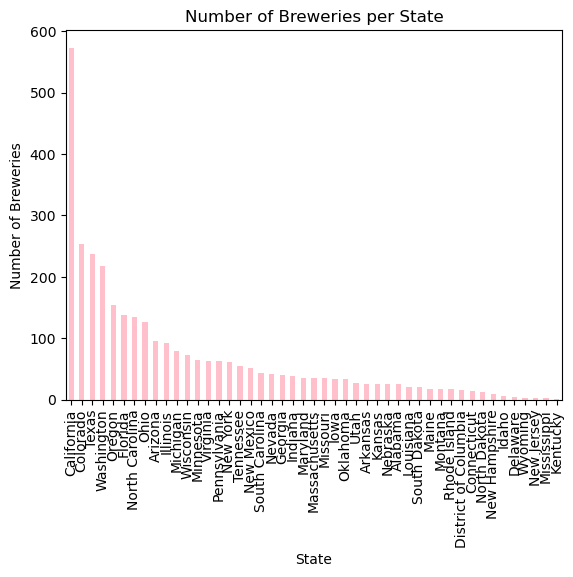

In [6]:
# plot Breweries per State
data_count = last_df["State"].value_counts()
plot_pandas = data_count.plot.bar(color='pink')  
plt.xlabel("State")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries per State")
plt.savefig("./data/perState.png")

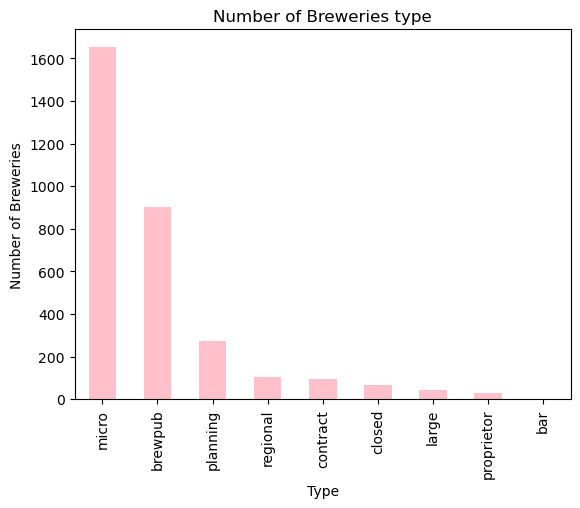

In [7]:
# Plot per type
data_count4 =last_df["brewery_type"].value_counts()
plot_pandas = data_count4.plot.bar(color='pink')  
plt.xlabel("Type")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries type")
plt.savefig("./data/type.png")

In [8]:
# Plot brewery type per state
countState = last_df.groupby(["State", "brewery_type"])["brewery_type"].count()
countState

State      brewery_type
Alabama    brewpub          3
           contract         1
           micro           17
           planning         4
Arizona    brewpub         36
                           ..
Wisconsin  planning         3
           proprietor       1
           regional         2
Wyoming    brewpub          1
           micro            2
Name: brewery_type, Length: 229, dtype: int64

In [9]:
countStateindex = countState.index
countStateindex

MultiIndex([(   'Alabama',    'brewpub'),
            (   'Alabama',   'contract'),
            (   'Alabama',      'micro'),
            (   'Alabama',   'planning'),
            (   'Arizona',    'brewpub'),
            (   'Arizona',   'contract'),
            (   'Arizona',      'large'),
            (   'Arizona',      'micro'),
            (   'Arizona',   'planning'),
            (   'Arizona',   'regional'),
            ...
            ('Washington',   'regional'),
            ( 'Wisconsin',    'brewpub'),
            ( 'Wisconsin',   'contract'),
            ( 'Wisconsin',      'large'),
            ( 'Wisconsin',      'micro'),
            ( 'Wisconsin',   'planning'),
            ( 'Wisconsin', 'proprietor'),
            ( 'Wisconsin',   'regional'),
            (   'Wyoming',    'brewpub'),
            (   'Wyoming',      'micro')],
           names=['State', 'brewery_type'], length=229)

In [10]:
countStateindex2 = countState.unstack()
countStateindex2

brewery_type,bar,brewpub,closed,contract,large,micro,planning,proprietor,regional
State,,,,,,,,,
Alabama,NaN,3.0,NaN,1.0,NaN,17.0,4.0,NaN,NaN
Arizona,NaN,36.0,NaN,4.0,2.0,42.0,10.0,NaN,1.0
Arkansas,NaN,10.0,NaN,1.0,NaN,14.0,1.0,NaN,NaN
California,NaN,142.0,29.0,16.0,12.0,304.0,41.0,9.0,20.0
Colorado,NaN,62.0,NaN,7.0,4.0,144.0,24.0,2.0,10.0
Connecticut,NaN,5.0,NaN,1.0,NaN,7.0,2.0,NaN,NaN
Delaware,NaN,2.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN
District of Columbia,NaN,6.0,NaN,2.0,NaN,5.0,2.0,NaN,1.0
Florida,NaN,24.0,NaN,3.0,3.0,84.0,20.0,1.0,3.0


<Axes: xlabel='State'>

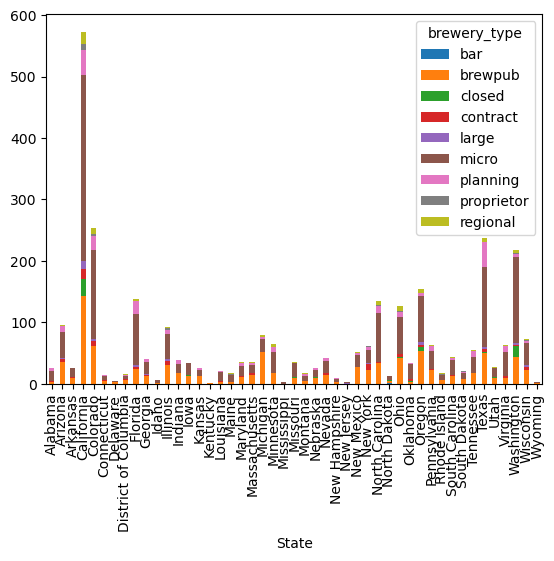

In [11]:
# Plot states stacked
countStateindex2.plot(kind='bar', stacked=True)

<Axes: xlabel='State'>

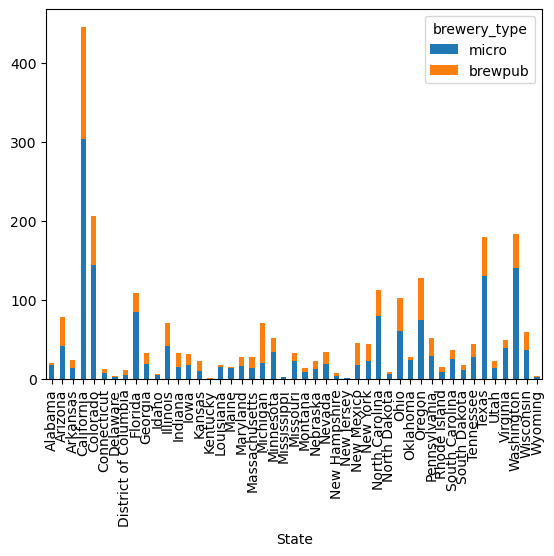

In [12]:
countStateindex2.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)

In [11]:
# Plot brewery type top 10 states
topstates = countStateindex2.loc[["California", "Colorado", "Texas", "Washington","Oregon", "Florida", "North Carolina", "Ohio", "Arizona", "Illinois"]]
topstates

brewery_type,bar,brewpub,closed,contract,large,micro,planning,proprietor,regional
State,,,,,,,,,
California,NaN,142.0,29.0,16.0,12.0,304.0,41.0,9.0,20.0
Colorado,NaN,62.0,NaN,7.0,4.0,144.0,24.0,2.0,10.0
Texas,NaN,50.0,2.0,5.0,3.0,130.0,40.0,NaN,7.0
Washington,NaN,44.0,17.0,2.0,3.0,140.0,5.0,1.0,5.0
Oregon,NaN,53.0,7.0,3.0,5.0,74.0,5.0,1.0,7.0
Florida,NaN,24.0,NaN,3.0,3.0,84.0,20.0,1.0,3.0
North Carolina,NaN,34.0,NaN,1.0,1.0,79.0,11.0,2.0,6.0
Ohio,NaN,42.0,1.0,5.0,1.0,60.0,8.0,1.0,8.0
Arizona,NaN,36.0,NaN,4.0,2.0,42.0,10.0,NaN,1.0


<Axes: xlabel='State'>

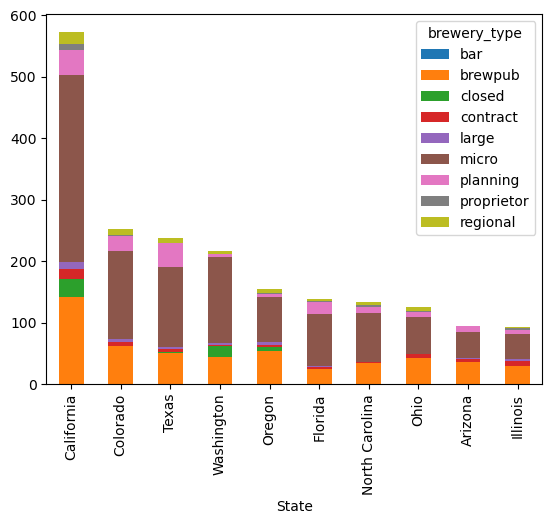

In [12]:
topstates.plot(kind='bar', stacked=True)

<Axes: xlabel='State'>

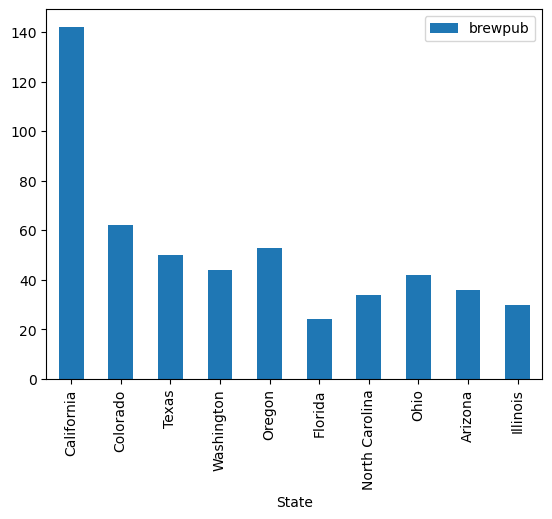

In [17]:
topstates.plot(kind='bar', y='brewpub', stacked=True)

<Axes: xlabel='State'>

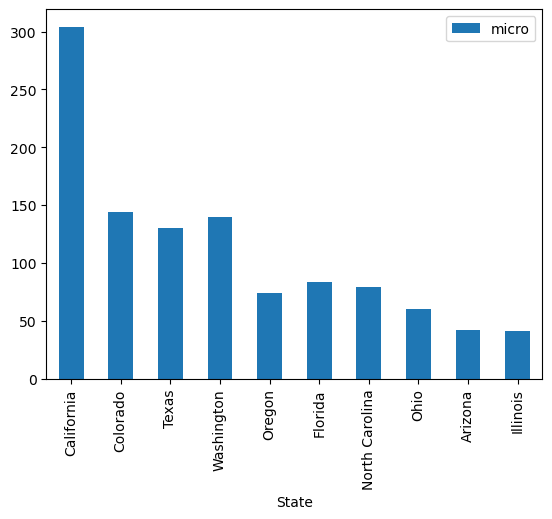

In [18]:
topstates.plot(kind='bar', y='micro', stacked=True)

<Axes: xlabel='State'>

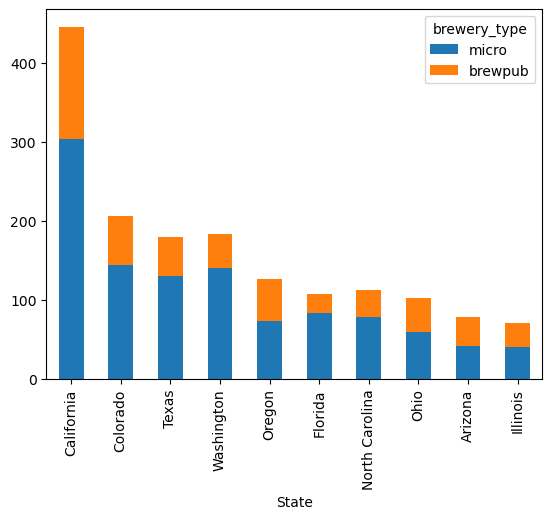

In [22]:
topstates.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)

In [13]:
# Plot brewery type tail 10 states
tailstates = countStateindex2.loc[["District of Columbia","Connecticut", "North Dakota", "New Hampshire", "Idaho", "Delaware", "Wyoming", "New Jersey", "Mississippi", "Kentucky"]]
tailstates

brewery_type,bar,brewpub,closed,contract,large,micro,planning,proprietor,regional
State,,,,,,,,,
District of Columbia,NaN,6.0,NaN,2.0,NaN,5.0,2.0,NaN,1.0
Connecticut,NaN,5.0,NaN,1.0,NaN,7.0,2.0,NaN,NaN
North Dakota,1.0,3.0,2.0,NaN,NaN,6.0,NaN,NaN,NaN
New Hampshire,NaN,3.0,NaN,NaN,NaN,4.0,3.0,NaN,NaN
Idaho,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
Delaware,NaN,2.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN
Wyoming,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
New Jersey,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
Mississippi,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


<Axes: xlabel='State'>

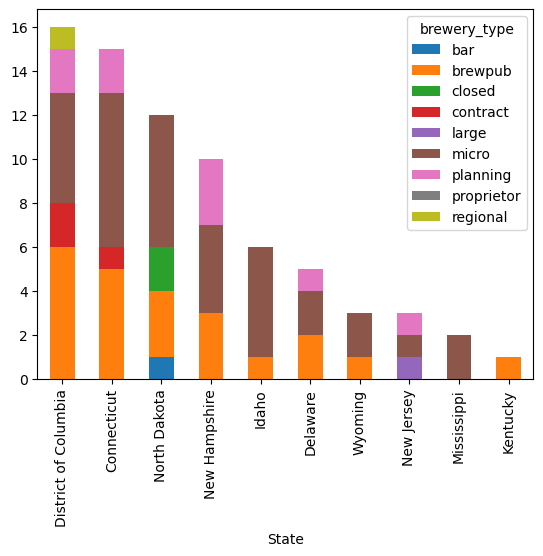

In [14]:
tailstates.plot(kind='bar', stacked=True)

<Axes: xlabel='State'>

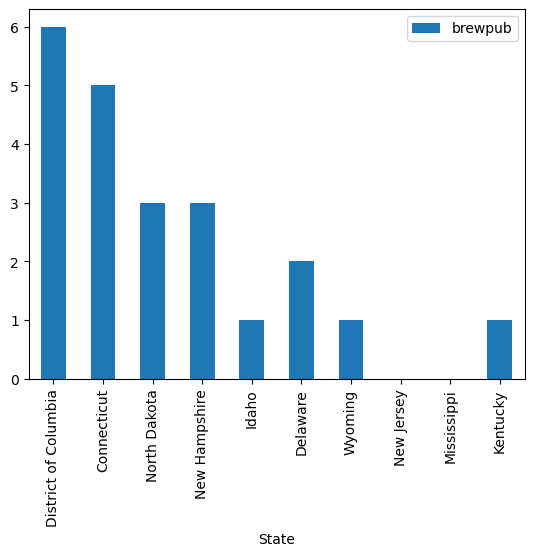

In [21]:
tailstates.plot(kind='bar', y='brewpub', stacked=True)

<Axes: xlabel='State'>

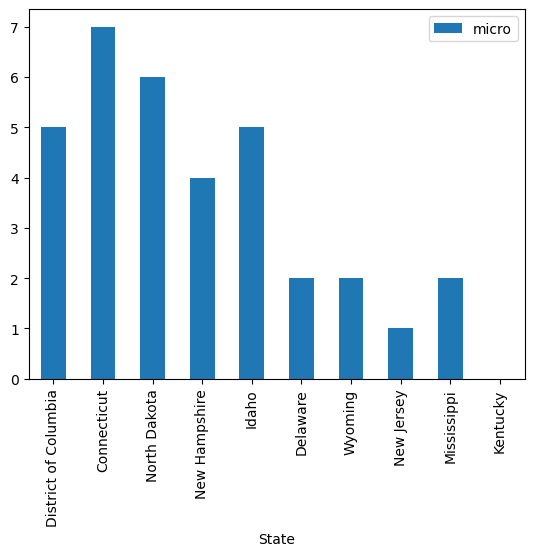

In [20]:
tailstates.plot(kind='bar', y='micro', stacked=True)

<Axes: xlabel='State'>

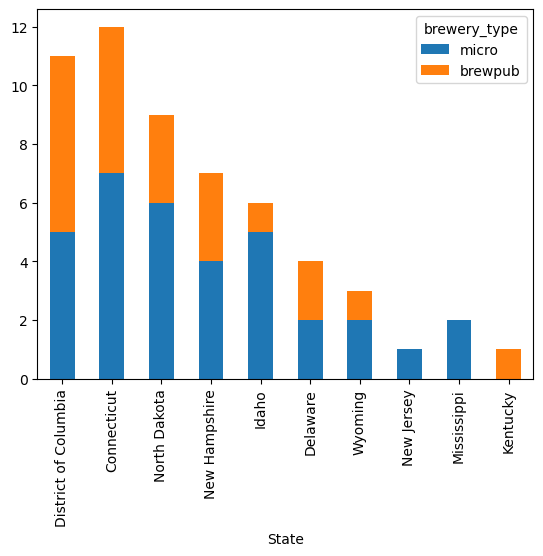

In [23]:
tailstates.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)